In [15]:
import os
import pandas as pd
import tensorflow as tf

from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
data_dir = '../../data/places/seg_train/seg_train'

In [10]:
train_df = []

for classes in os.listdir(data_dir):

    for file in os.listdir(os.path.join(data_dir, classes)):
        file_path = os.path.join(classes, file)
        train_df.append([file_path, classes])

train_dtl_df = pd.DataFrame(train_df, columns=['file', 'label'])
train_dtl_df

,file,label
0,buildings\0.jpg,buildings
1,buildings\10006.jpg,buildings
2,buildings\1001.jpg,buildings
3,buildings\10014.jpg,buildings
4,buildings\10018.jpg,buildings
...,...,...
14029,street\9961.jpg,street
14030,street\9967.jpg,street
14031,street\9978.jpg,street
14032,street\9989.jpg,street


In [7]:
generator = ImageDataGenerator(rescale=1/255.)

In [11]:
train_batches = generator.flow_from_dataframe(dataframe=train_dtl_df,
                                              directory=data_dir,
                                              x_col='file',
                                              y_col='label',
                                              batch_size=8)

Found 14034 validated image filenames belonging to 6 classes.


In [12]:
train_batches.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

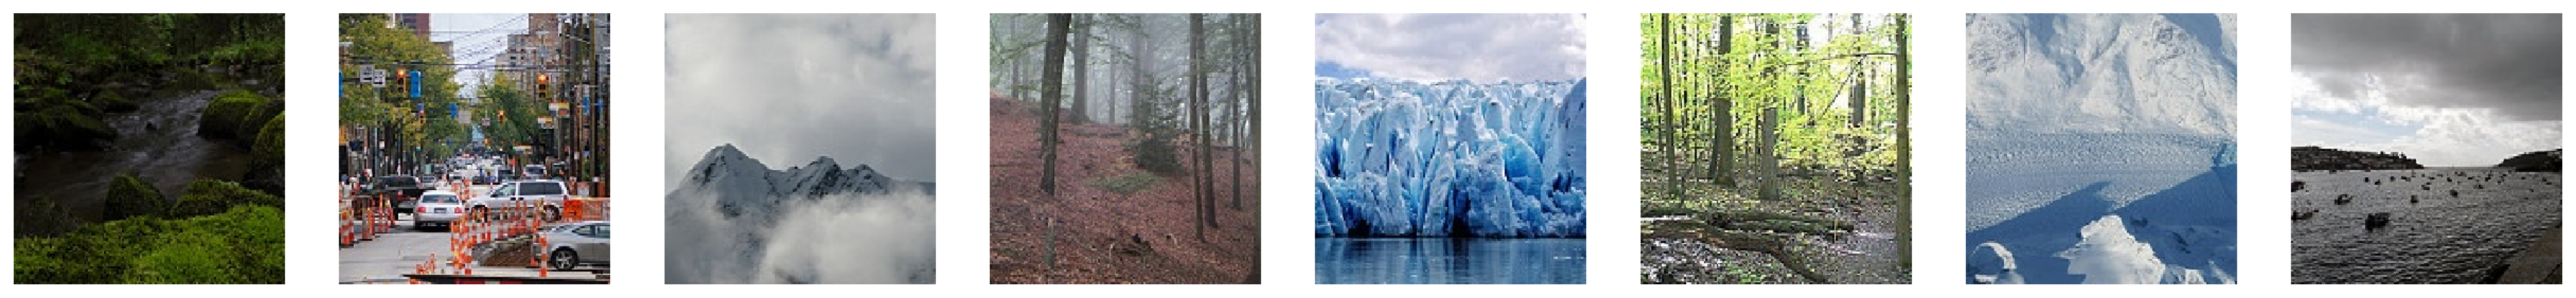

In [22]:
figure, axes = plt.subplots(nrows=1, ncols=8, figsize=[24,6], dpi=300)

for key, image in enumerate(next(train_batches)[0]):
    axes[key].imshow(image)
    axes[key].axis('off')

plt.show()